<a href="https://colab.research.google.com/github/dimysium1123/testing-reposityory/blob/main/Covid_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library yang diperlukan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
#import dataset
url = 'https://raw.githubusercontent.com/dimysium1123/testing-reposityory/main/covid_worldwidee.csv'
data = pd.read_csv(url, encoding="ISO-8859-1", sep = ";")
data.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,104196861,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08
1,2,India,44682784,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09
2,3,France,39524311,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07
3,4,Germany,37779833,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07
4,5,Brazil,36824580,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08


In [3]:
class ColumnData:
    country = 'Country'
    cases = 'Total Cases'
    deaths = 'Total Deaths'
    recovered = 'Total Recovered'
    actives_cases = 'Active Cases'
    test = 'Total Test'
    population = 'Population'
    mortality = 'Mortality'

In [4]:
data = data[[
    ColumnData.country,
    ColumnData.cases,
    ColumnData.deaths,
    ColumnData.recovered,
    ColumnData.actives_cases,
    ColumnData.population
]]

In [5]:
data = data.dropna(axis=0, how="any")

In [6]:
#Membuat variabel baru yaitu mortality (kematian/kasus)
data[ColumnData.mortality] = data[ColumnData.deaths]/data[ColumnData.cases]

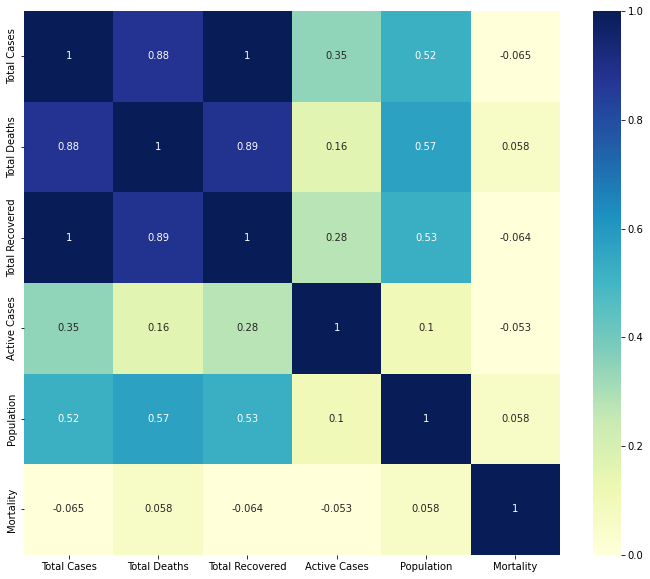

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data.corr(), vmin=0, cmap='YlGnBu', annot=True)
plt.show()

In [8]:
group = data.groupby(ColumnData.country)
t = group.tail(1).sort_values(ColumnData.cases, ascending=False).set_index(ColumnData.country)

In [9]:
corr = t.corr().iloc[[0, 1]].transpose()
corr = corr[(corr[ColumnData.cases] > 0.25)].sort_values(ColumnData.cases, ascending=False)
features = corr.index.tolist()
features.append(ColumnData.mortality)
print('Selected features:', features)

df = t[features].copy()
df.head()

Selected features: ['Total Cases', 'Total Recovered', 'Total Deaths', 'Population', 'Active Cases', 'Mortality']


,Total Cases,Total Recovered,Total Deaths,Population,Active Cases,Mortality
Country,,,,,,
USA,104196861,101322779.0,1132935.0,3.348053e+08,1741147.0,0.010873
India,44682784,44150289.0,530740.0,1.406632e+09,1755.0,0.011878
France,39524311,39264546.0,164233.0,6.558452e+07,95532.0,0.004155
Germany,37779833,37398100.0,165711.0,8.388360e+07,216022.0,0.004386
Brazil,36824580,35919372.0,697074.0,2.153536e+08,208134.0,0.018930


In [10]:
def create_bins(df, columns, q=5):
    for column in columns:
        df[column] = pd.qcut(df[column], q, duplicates='drop').cat.codes

In [11]:
create_bins(df, [
    ColumnData.cases,
    ColumnData.deaths,
    ColumnData.recovered,
    ColumnData.actives_cases,
    ColumnData.population,
    ColumnData.mortality
], q=7)

In [12]:
def normalize_data(df, columns):
    minMaxScaler = MinMaxScaler()
    df[columns] = minMaxScaler.fit_transform(df[columns])

In [13]:
normalize_data(df, df.columns)


In [14]:
X = df[['Total Cases','Mortality', 'Total Deaths', 'Total Recovered', 'Population']]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

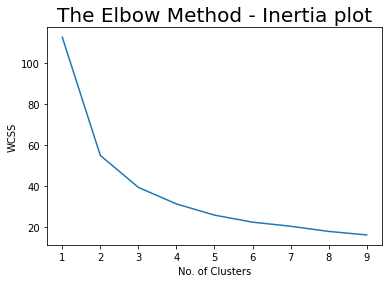

In [15]:
#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=4)
pred = kmeans.fit_predict(X[X.columns])
t['K-means'], X['K-means'] = [pred, pred]
X[X.columns].sort_values(['K-means', ColumnData.mortality, ColumnData.cases, ColumnData.recovered, ColumnData.population, ColumnData.deaths], ascending=False).style.background_gradient(
    cmap='YlGnBu', low=0, high=0.2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Total Cases,Mortality,Total Deaths,Total Recovered,Population,K-means
Country,,,,,,
Mexico,1.000000,1.000000,1.000000,1.000000,1.000000,3
Indonesia,1.000000,1.000000,1.000000,1.000000,1.000000,3
South Africa,0.833333,1.000000,1.000000,0.833333,1.000000,3
Peru,0.833333,1.000000,1.000000,0.833333,0.833333,3
Bulgaria,0.833333,1.000000,1.000000,0.833333,0.500000,3
Myanmar,0.666667,1.000000,0.833333,0.666667,1.000000,3
Sri Lanka,0.666667,1.000000,0.833333,0.666667,0.833333,3
Ecuador,0.666667,1.000000,1.000000,0.666667,0.666667,3
Egypt,0.666667,1.000000,0.833333,0.500000,1.000000,3


In [17]:
c = t.sort_values(['K-means', ColumnData.cases], ascending=False)
data = [go.Bar(x=c[(c['K-means'] == i)].index, y=c[(c['K-means'] == i)][ColumnData.cases],
               text=c[(c['K-means'] == i)][ColumnData.cases], name=i) for i in range(0, 6)]

vis_bar = go.Figure(data=data)
vis_bar.update_layout(title='K-means Clustering: number of cases by cluster',
                      xaxis_title='World wide', yaxis_title='Country Cases')
vis_bar.show()

In [18]:
# visualisasi menggunakan barchart
# visualisasi mortality rate by clusters
c = t.sort_values(['K-means', ColumnData.mortality], ascending=False)
data = [go.Bar(x=c[(c['K-means'] == i)].index, y=c[(c['K-means'] == i)][ColumnData.mortality],
               text=c[(c['K-means'] == i)][ColumnData.mortality], name=i) for i in range(0, 6)]
data.append(
    go.Scatter(
        x=t.sort_values(ColumnData.mortality, ascending=False).index,
        y=np.full((1, len(t.index)), 0.03).tolist()[0],
        marker_color='black',
        name='Worldwide avg'
    )
)

vis_bar2 = go.Figure(data=data)
vis_bar2.update_layout(title='K-means Clustering: mortality rate by cluster',
                       xaxis_title='Worldwide', yaxis_title='Mortality rate')
vis_bar2.show()

## Hierarchical (Dendogram)

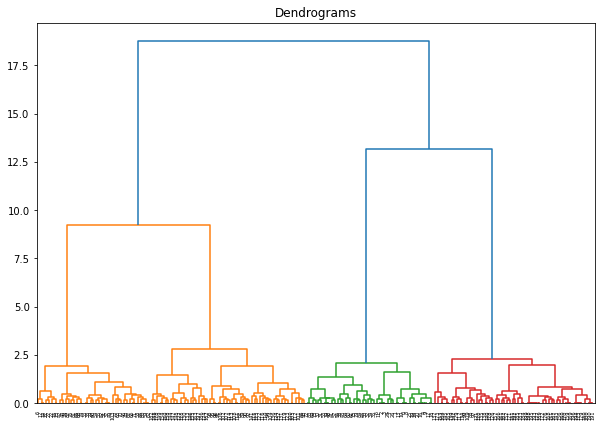

In [19]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

##Clustering

In [20]:
'''Total Cases and Mortality'''
X1 = df[['Total Cases' , 'Mortality']].iloc[: , :].values
inertia1 = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia1.append(algorithm.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



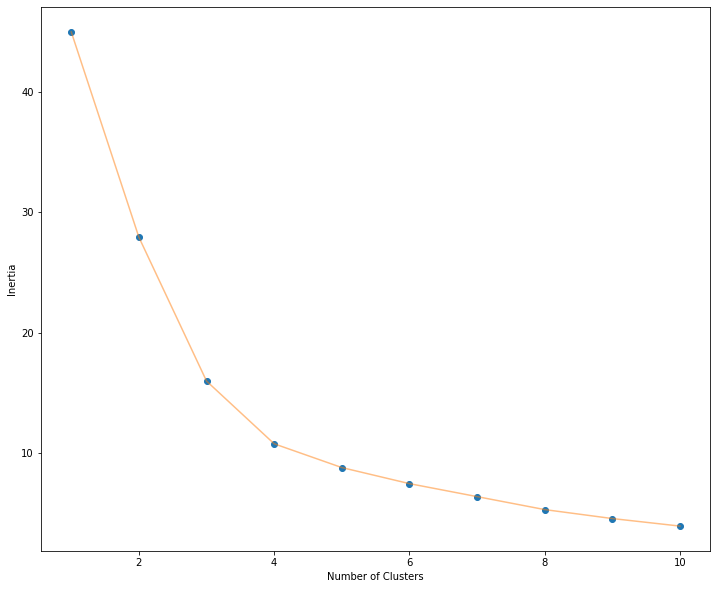

In [21]:
plt.figure(1 , figsize = (12 ,10))
plt.plot(np.arange(1 , 11) , inertia1 , 'o')
plt.plot(np.arange(1 , 11) , inertia1 , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [22]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [23]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

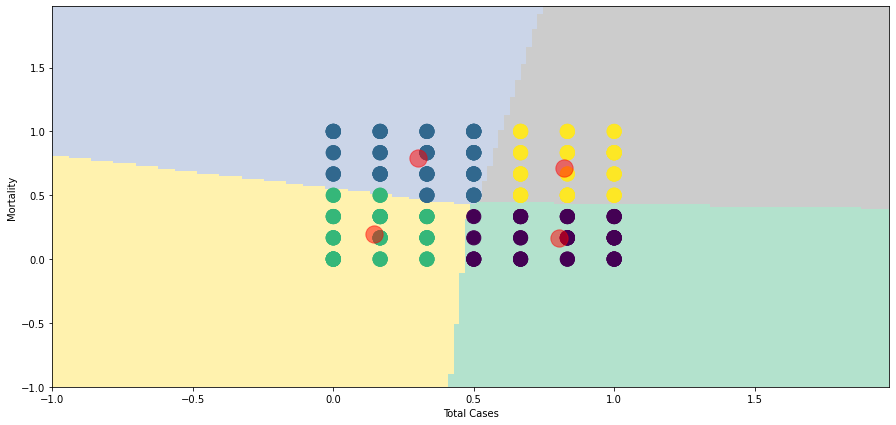

In [24]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Total Cases' ,y = 'Mortality' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Mortality') , plt.xlabel('Total Cases')
plt.show()

In [25]:
'''Total Cases and Total Recovered'''
X2 = df[['Total Cases' , 'Total Recovered']].iloc[: , :].values
inertia2 = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia2.append(algorithm.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



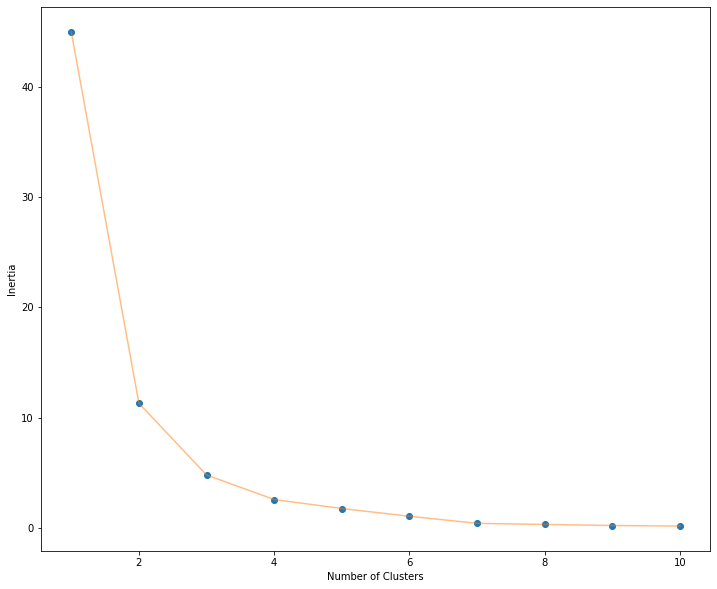

In [26]:
plt.figure(1 , figsize = (12 ,10))
plt.plot(np.arange(1 , 11) , inertia2 , 'o')
plt.plot(np.arange(1 , 11) , inertia2 , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [27]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [28]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

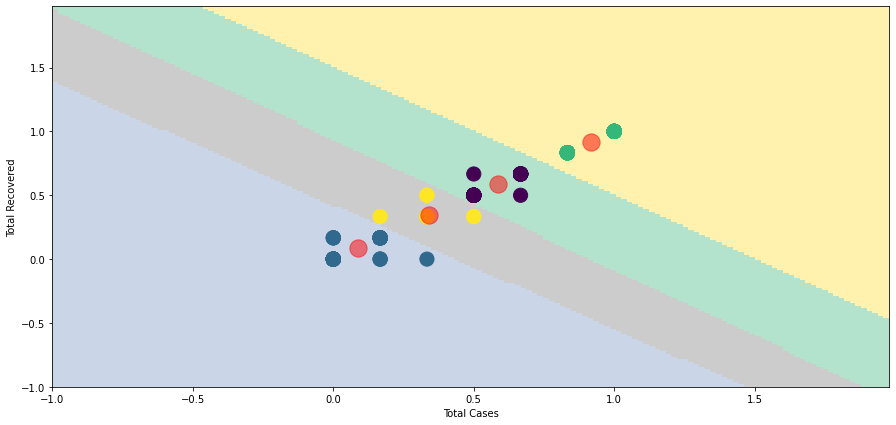

In [29]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Total Cases' ,y = 'Total Recovered' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Total Recovered') , plt.xlabel('Total Cases')
plt.show()

In [30]:
'''Population and Total Cases'''
X3 = df[['Population', 'Total Cases']].iloc[: , :].values
inertia3 = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia3.append(algorithm.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



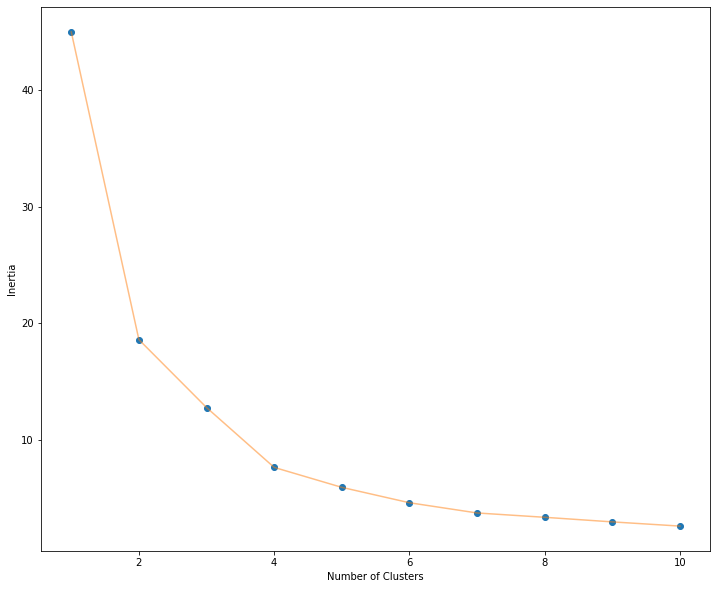

In [31]:
plt.figure(1 , figsize = (12 ,10))
plt.plot(np.arange(1 , 11) , inertia3 , 'o')
plt.plot(np.arange(1 , 11) , inertia3 , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [32]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [33]:
h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

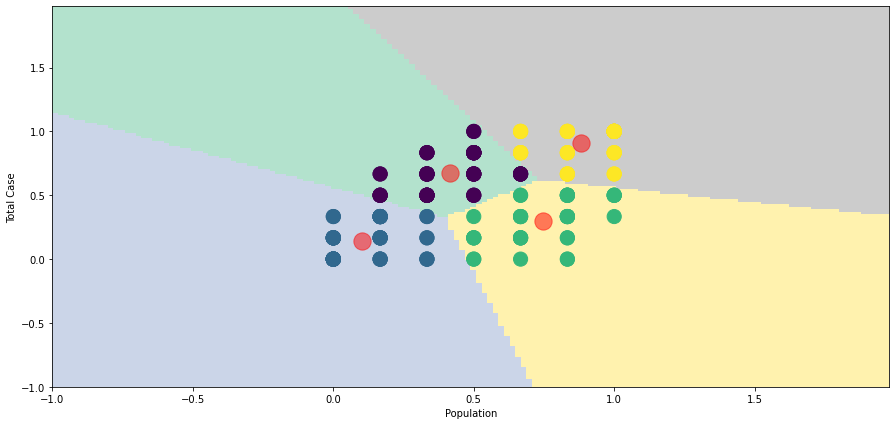

In [34]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Population' ,y = 'Total Cases' , data = df , c = labels3 , 
            s = 200 )
plt.scatter(x = centroids3[: , 0] , y =  centroids3[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Total Case') , plt.xlabel('Population')
plt.show()

In [35]:
'''Total Recovered and Mortality'''
X4 = df[['Total Recovered' , 'Mortality']].iloc[: , :].values
inertia4 = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X4)
    inertia4.append(algorithm.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



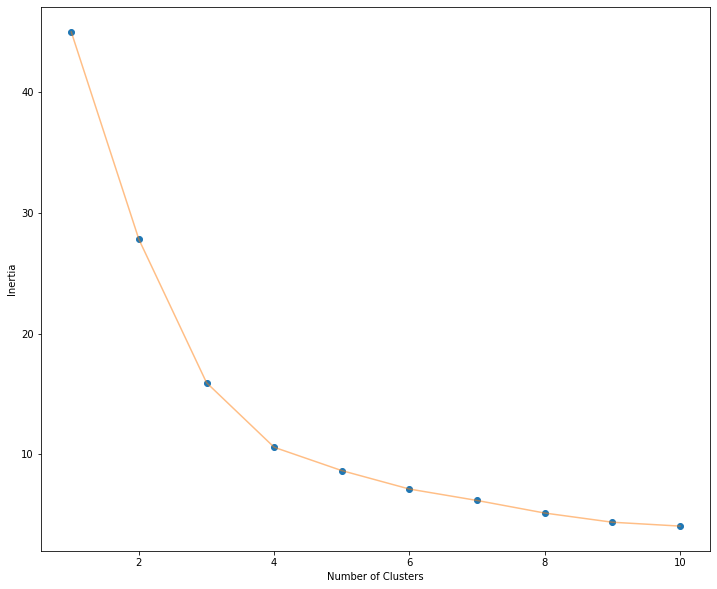

In [36]:
plt.figure(1 , figsize = (12 ,10))
plt.plot(np.arange(1 , 11) , inertia4 , 'o')
plt.plot(np.arange(1 , 11) , inertia4 , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [37]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X4)
labels4 = algorithm.labels_
centroids4 = algorithm.cluster_centers_

In [38]:
h = 0.02
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

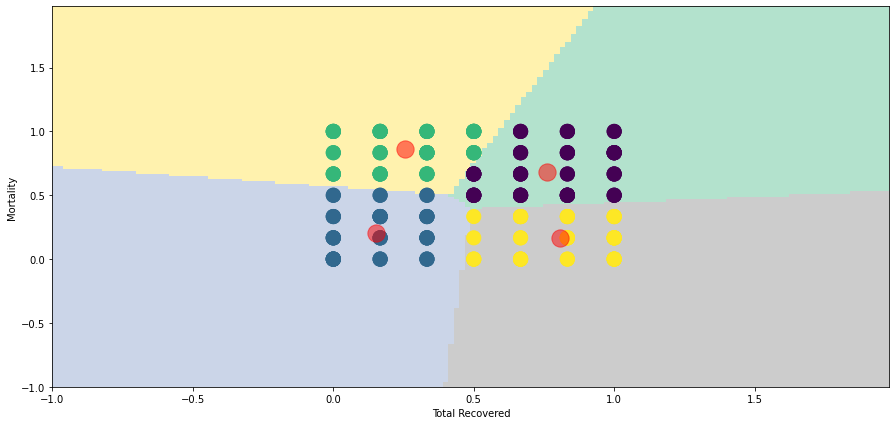

In [39]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Total Recovered' ,y = 'Mortality' , data = df , c = labels4 , 
            s = 200 )
plt.scatter(x = centroids4[: , 0] , y =  centroids4[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Mortality') , plt.xlabel('Total Recovered')
plt.show()

In [40]:
'''Population and Mortality'''
X5 = df[['Population' , 'Mortality']].iloc[: , :].values
inertia5 = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X5)
    inertia5.append(algorithm.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



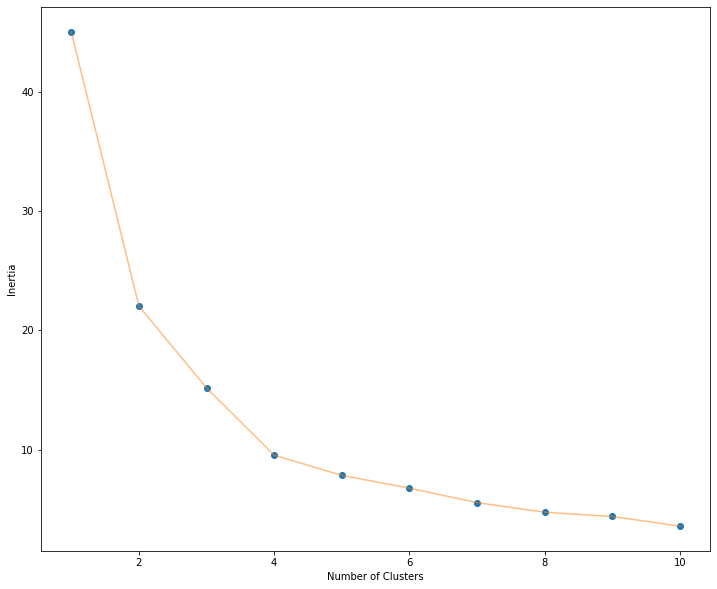

In [41]:
plt.figure(1 , figsize = (12 ,10))
plt.plot(np.arange(1 , 11) , inertia5 , 'o')
plt.plot(np.arange(1 , 11) , inertia5 , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [42]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X5)
labels5 = algorithm.labels_
centroids5 = algorithm.cluster_centers_

In [43]:
h = 0.02
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

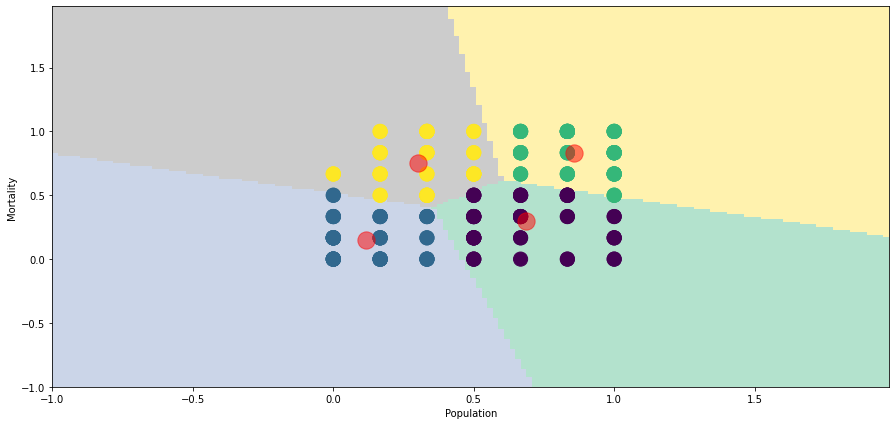

In [44]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Population' ,y = 'Mortality' , data = df , c = labels5 , 
            s = 200 )
plt.scatter(x = centroids5[: , 0] , y =  centroids5[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Mortality') , plt.xlabel('Population')
plt.show()

In [45]:
'''Recovered and Total Cases'''
X6 = df[['Population' , 'Total Recovered']].iloc[: , :].values
inertia6 = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X6)
    inertia6.append(algorithm.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



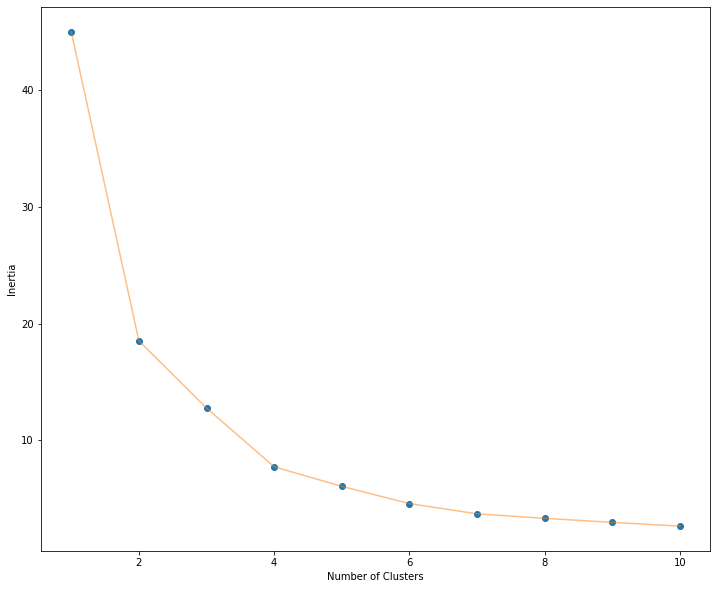

In [46]:
plt.figure(1 , figsize = (12 ,10))
plt.plot(np.arange(1 , 11) , inertia6 , 'o')
plt.plot(np.arange(1 , 11) , inertia6 , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [47]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X6)
labels6 = algorithm.labels_
centroids6 = algorithm.cluster_centers_

In [48]:
h = 0.02
x_min, x_max = X6[:, 0].min() - 1, X6[:, 0].max() + 1
y_min, y_max = X6[:, 1].min() - 1, X6[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

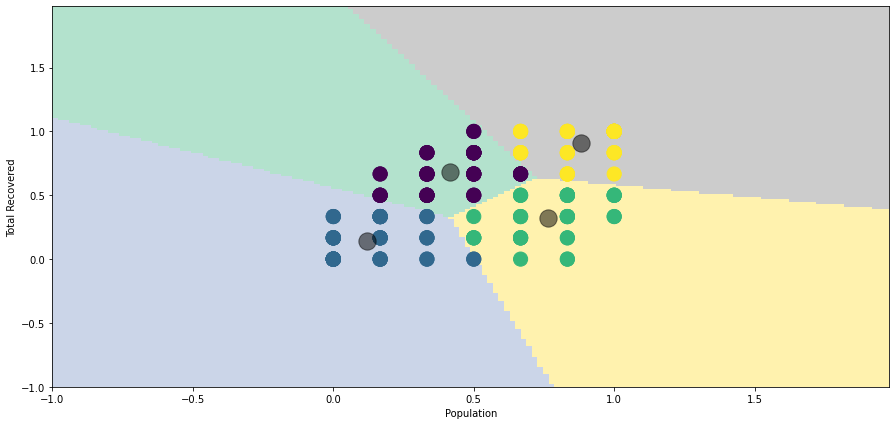

In [49]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Population' ,y = 'Total Recovered' , data = df , c = labels6 , 
            s = 200 )
plt.scatter(x = centroids6[: , 0] , y =  centroids6[: , 1] , s = 300 , c = 'black' , alpha = 0.5)
plt.ylabel('Total Recovered') , plt.xlabel('Population')
plt.show()

## 3D Clustering

In [50]:
X3d = df[['Mortality' , 'Total Cases' ,'Population']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3d)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



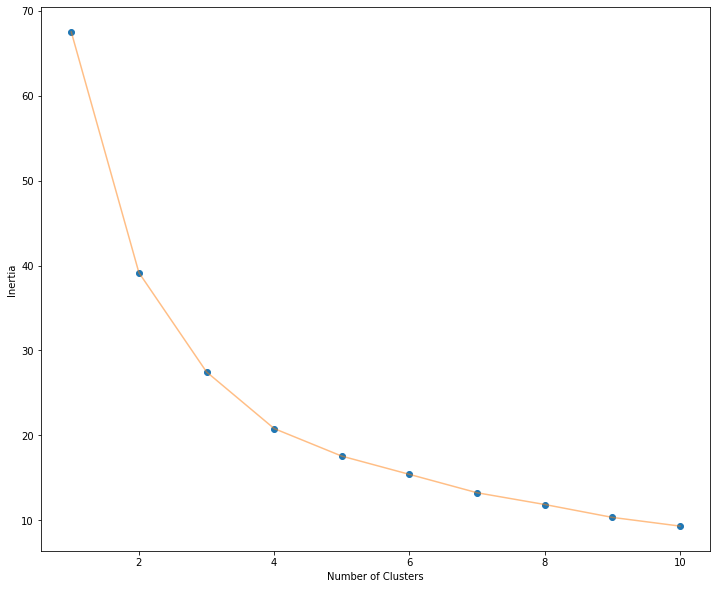

In [51]:
plt.figure(1 , figsize = (12 ,10))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [52]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3d)
labels3d = algorithm.labels_
centroids3d = algorithm.cluster_centers_

In [53]:
df['label3d'] =  labels3d
trace1 = go.Scatter3d(
    x= df['Mortality'],
    y= df['Total Cases'],
    z= df['Population'],
    mode='markers',
     marker=dict(
        color = df['label3d'], 
        size= 20,
        line=dict(
            color= df['label3d'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Mortality'),
            yaxis = dict(title  = 'Total Cases'),
            zaxis = dict(title  = 'Population')
        )
)
fig = go.Figure(data=data, layout=layout)
fig.show()